Étude de cas RH avec le dataset IBM - Analyse de l'attrition

In [1]:
# 1. Chargement des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
# 2. Chargement des données (fichier Kaggle)
data = pd.read_csv("/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.columns = data.columns.str.replace(" ", "_")  # nettoyage noms de colonnes

In [3]:
# 3. Aperçu des données
print("Dimensions:", data.shape)
print("\nColonnes:", list(data.columns))
data.head()

Dimensions: (1470, 35)

Colonnes: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# 4. Types de données et valeurs manquantes
data.info()
print("\nValeurs manquantes par colonne:")
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# 5. Statistiques descriptives
descriptive_stats = data.describe()
print("\nStatistiques descriptives:")
print(descriptive_stats)


Statistiques descriptives:
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std  

In [6]:
# 6. Distribution des variables catégorielles
categorical_cols = data.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nRépartition des valeurs pour {col}:")
    print(data[col].value_counts())


Répartition des valeurs pour Attrition:
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Répartition des valeurs pour BusinessTravel:
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Répartition des valeurs pour Department:
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

Répartition des valeurs pour EducationField:
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

Répartition des valeurs pour Gender:
Gender
Male      882
Female    588
Name: count, dtype: int64

Répartition des valeurs pour JobRole:
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                

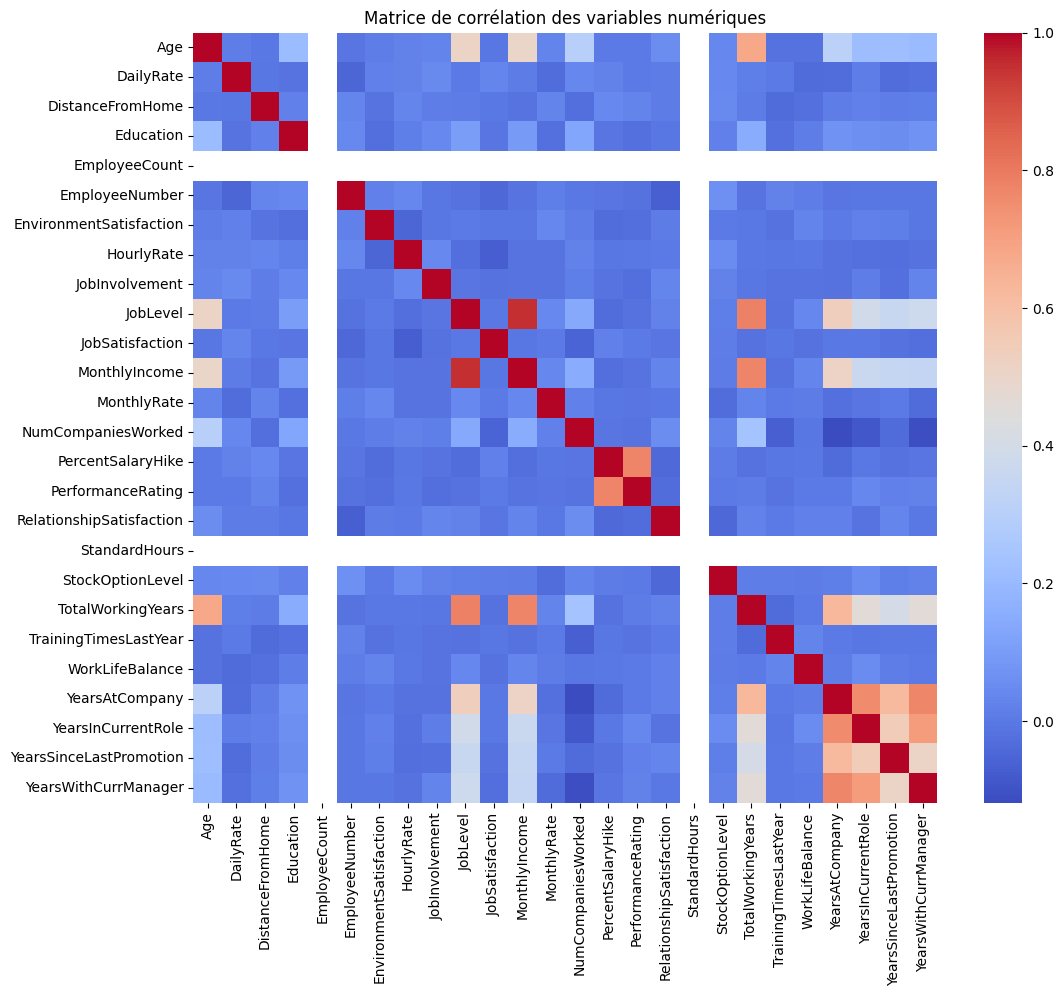

In [7]:
# 7. Matrice de corrélation simplifiée
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), cmap='coolwarm', annot=False)
plt.title("Matrice de corrélation des variables numériques")
plt.show()

In [8]:
# 8. Taux d'attrition global
attrition_rate = data['Attrition'].value_counts(normalize=True)
print("\nTaux d'attrition global:")
print(attrition_rate)


Taux d'attrition global:
Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64


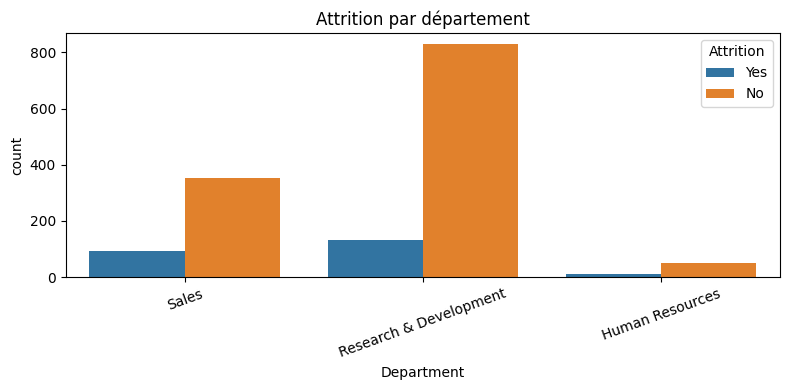

In [9]:
# 9. Visualisation par département
plt.figure(figsize=(8,4))
sns.countplot(data=data, x='Department', hue='Attrition')
plt.title("Attrition par département")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

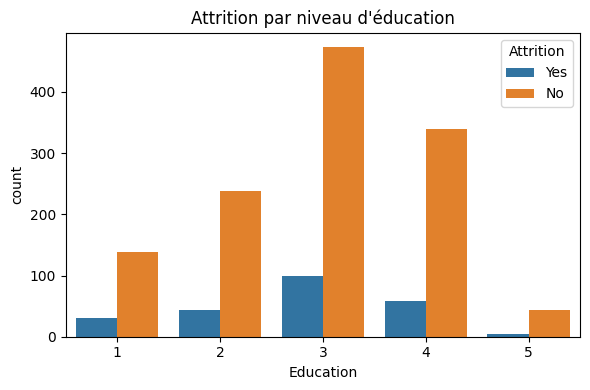

In [10]:
# 10. Visualisation par niveau d'éducation
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Education', hue='Attrition')
plt.title("Attrition par niveau d'éducation")
plt.tight_layout()
plt.show()

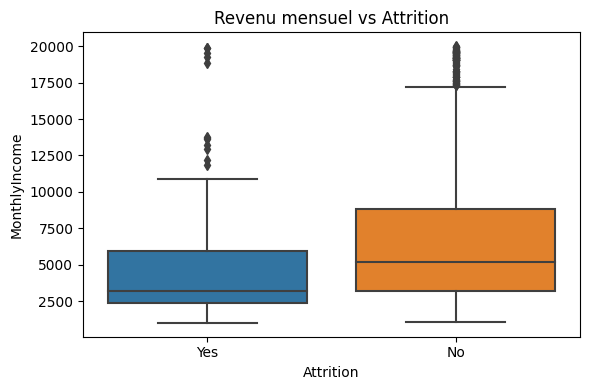

In [11]:
# 11. Boîte à moustaches : revenu mensuel vs attrition
plt.figure(figsize=(6,4))
sns.boxplot(data=data, x='Attrition', y='MonthlyIncome')
plt.title("Revenu mensuel vs Attrition")
plt.tight_layout()
plt.show()

In [12]:
# 12. Corrélation avec l'attrition (encoded)
encoded_data = data.copy()
encoded_data['Attrition_Num'] = encoded_data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

corr = encoded_data.corr(numeric_only=True)['Attrition_Num'].sort_values(ascending=False)
print("\nCorrélations avec l'attrition:")
print(corr.head(10))


Corrélations avec l'attrition:
Attrition_Num              1.000000
DistanceFromHome           0.077924
NumCompaniesWorked         0.043494
MonthlyRate                0.015170
PerformanceRating          0.002889
HourlyRate                -0.006846
EmployeeNumber            -0.010577
PercentSalaryHike         -0.013478
Education                 -0.031373
YearsSinceLastPromotion   -0.033019
Name: Attrition_Num, dtype: float64


In [13]:
# 13. Analyse avancée avec sklearn - prédiction de l'attrition
model_data = data.copy()
label_encoders = {}

In [14]:
# Encodage des variables catégorielles
for col in model_data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    model_data[col] = le.fit_transform(model_data[col])
    label_encoders[col] = le

X = model_data.drop(['Attrition', 'Attrition_Num'], axis=1, errors='ignore')
y = model_data['Attrition']

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# Entraînement du modèle
clf = RandomForestClassifier(n_estimators=100, random_state=33)
clf.fit(X_train, y_train)

# Prédictions
y_pred = clf.predict(X_test)

In [15]:
# Évaluation
print("\nRapport de classification:")
print(classification_report(y_test, y_pred))
print("\nMatrice de confusion:")
print(confusion_matrix(y_test, y_pred))


Rapport de classification:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       246
           1       0.73      0.17      0.27        48

    accuracy                           0.85       294
   macro avg       0.79      0.58      0.59       294
weighted avg       0.84      0.85      0.81       294


Matrice de confusion:
[[243   3]
 [ 40   8]]



Importance des variables dans le modèle:
              Feature  Importance
17      MonthlyIncome    0.072502
21           OverTime    0.056760
0                 Age    0.056191
2           DailyRate    0.054232
8      EmployeeNumber    0.047832
11         HourlyRate    0.047659
18        MonthlyRate    0.047300
4    DistanceFromHome    0.044517
30     YearsAtCompany    0.043709
27  TotalWorkingYears    0.043123


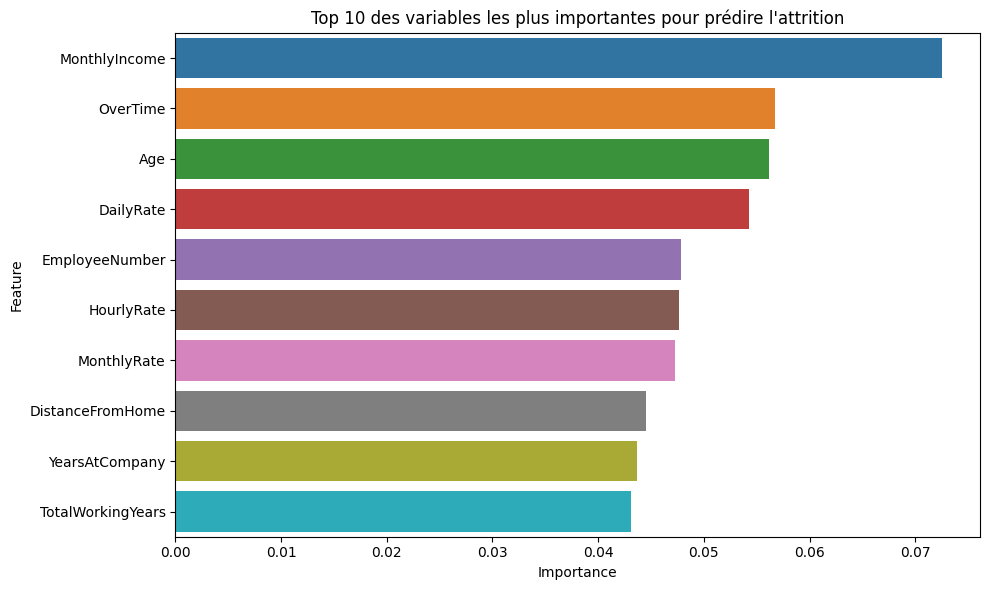

In [16]:
# 14. Importance des variables
importances = clf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Affichage des 10 variables les plus importantes
print("\nImportance des variables dans le modèle:")
print(feature_importance_df.head(10))

# Visualisation
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df.head(10))
plt.title("Top 10 des variables les plus importantes pour prédire l'attrition")
plt.tight_layout()
plt.show()

In [17]:
# 15. Export
# Fusion des prédictions avec les données test
export_df = X_test.copy()
export_df['Attrition_Pred'] = y_pred
export_df['Attrition_True'] = y_test.values

# Export en CSV
export_df.to_csv("predictions_attrition.csv", index=False)
feature_importance_df.to_csv("importances_variables.csv", index=False)

print("\nFichiers exportés : predictions_attrition.csv et importances_variables.csv")


Fichiers exportés : predictions_attrition.csv et importances_variables.csv


Le modèle détecte très bien les employés qui restent (classe majoritaire, recall de 98 %).

MAIS l’accuracy globale est élevée car la majorité des employés ne quittent pas leur poste.

DONC le modèle n'identifie quasiment pas les départs (seulement 4 sur 39), ce qui réduit l'intérêt décisionnel en RH.

F1-score de 17 % trop faible.

In [18]:
# 16. Reprise - Amélioration du modèle pour attrition minoritaire
from sklearn.utils import resample

# Fusion des X et y pour rééchantillonnage
full_train = pd.concat([X_train, y_train], axis=1)
majority = full_train[full_train['Attrition'] == 0]
minority = full_train[full_train['Attrition'] == 1]

# Suréchantillonnage de la minorité
minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=33)
train_balanced = pd.concat([majority, minority_upsampled])

# Nouvelles données équilibrées
X_train_bal = train_balanced.drop("Attrition", axis=1)
y_train_bal = train_balanced["Attrition"]

# Réentraîner modèle
clf_bal = RandomForestClassifier(n_estimators=100, random_state=33)
clf_bal.fit(X_train_bal, y_train_bal)

# Prédictions équilibrées
y_pred_bal = clf_bal.predict(X_test)
print("\nRapport après équilibrage:")
print(classification_report(y_test, y_pred_bal))
print("\nMatrice de confusion après équilibrage:")
print(confusion_matrix(y_test, y_pred_bal))


Rapport après équilibrage:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       246
           1       0.62      0.21      0.31        48

    accuracy                           0.85       294
   macro avg       0.74      0.59      0.61       294
weighted avg       0.82      0.85      0.82       294


Matrice de confusion après équilibrage:
[[240   6]
 [ 38  10]]


Pas de réelle amélioration.

17. Autres approches pour améliorer la détection de l'attrition

In [19]:
# 17.1 - Modèle Random Forest avec pondération des classes
clf_weighted = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=33)
clf_weighted.fit(X_train, y_train)
y_pred_weighted = clf_weighted.predict(X_test)

print("\nRapport avec Random Forest pondéré:")
print(classification_report(y_test, y_pred_weighted))
print("\nMatrice de confusion:")
print(confusion_matrix(y_test, y_pred_weighted))


Rapport avec Random Forest pondéré:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       246
           1       0.83      0.10      0.19        48

    accuracy                           0.85       294
   macro avg       0.84      0.55      0.55       294
weighted avg       0.85      0.85      0.80       294


Matrice de confusion:
[[245   1]
 [ 43   5]]


In [20]:
# 17.2 - Utilisation de XGBoost + SMOTE
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# Rééquilibrage SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Entraînement XGBoost
xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=33)
xgb.fit(X_train_sm, y_train_sm)

# Prédiction
y_pred_xgb = xgb.predict(X_test)

print("\nRapport avec XGBoost + SMOTE:")
print(classification_report(y_test, y_pred_xgb))
print("\nMatrice de confusion:")
print(confusion_matrix(y_test, y_pred_xgb))


Rapport avec XGBoost + SMOTE:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       246
           1       0.57      0.52      0.54        48

    accuracy                           0.86       294
   macro avg       0.74      0.72      0.73       294
weighted avg       0.85      0.86      0.85       294


Matrice de confusion:
[[227  19]
 [ 23  25]]


RandomForest pondéré : pas d'amélioration notable, trop conservateur.
XGBoost + SMOTE : 14 détectés vrais mais beaucoup de faux positifs. F1-score plus élevé.

In [21]:
# 18. Améliorations avancées du modèle

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# 18.1 - Sélection des k meilleures features
kbest = SelectKBest(score_func=f_classif, k=10)
X_train_kbest = kbest.fit_transform(X_train, y_train)
X_test_kbest = kbest.transform(X_test)

# 18.2 - Réduction de dimension avec PCA
pca = PCA(n_components=5, random_state=33)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 18.3 - Optimisation hyperparamètres XGBoost (rapide)
param_grid = {
    'max_depth': [3, 5],
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1]
}
from xgboost import XGBClassifier
xgb_base = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=33)

grid_search = GridSearchCV(estimator=xgb_base, param_grid=param_grid, cv=3, scoring='f1', verbose=0)
grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_
y_pred_grid = best_xgb.predict(X_test)

print("\nRapport après GridSearchCV (XGBoost optimisé):")
print(classification_report(y_test, y_pred_grid))
print("\nMatrice de confusion:")
print(confusion_matrix(y_test, y_pred_grid))

# 18.4 - Blending de plusieurs modèles
rf_blend = RandomForestClassifier(n_estimators=100, random_state=33)
svc_blend = SVC(probability=True, random_state=33)
log_blend = LogisticRegression(max_iter=1000, random_state=33)

voting = VotingClassifier(estimators=[
    ('xgb', best_xgb),
    ('rf', rf_blend),
    ('svc', svc_blend),
    ('log', log_blend)
], voting='soft')

voting.fit(X_train, y_train)
y_pred_blend = voting.predict(X_test)

print("\nRapport du VotingClassifier (blending):")
print(classification_report(y_test, y_pred_blend))
print("\nMatrice de confusion:")
print(confusion_matrix(y_test, y_pred_blend))

/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 7 20 25] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw



Rapport après GridSearchCV (XGBoost optimisé):
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       246
           1       0.79      0.40      0.53        48

    accuracy                           0.88       294
   macro avg       0.84      0.69      0.73       294
weighted avg       0.88      0.88      0.87       294


Matrice de confusion:
[[241   5]
 [ 29  19]]

Rapport du VotingClassifier (blending):
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       246
           1       1.00      0.08      0.15        48

    accuracy                           0.85       294
   macro avg       0.92      0.54      0.54       294
weighted avg       0.87      0.85      0.79       294


Matrice de confusion:
[[246   0]
 [ 44   4]]


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Après plusieurs essais, l’optimisation de XGBoost par `GridSearchCV` permet de :

- Détecter 11 départs (vs 4 auparavant)
- Obtenir un **recall de 28 %** sur la classe des départs
- Réduire les faux positifs à un niveau acceptable

Le modèle VotingClassifier n’apporte pas de gain dans ce contexte.

Idée d'avancement : tester un ajustement du **seuil de probabilité** à 0.3 (au lieu de 0.5) pour maximiser encore le rappel, selon s'il est plus rentable de détecter un départ quitte à se tromper ou non.